In [38]:
import pandas as pd

from matplotlib import pyplot as plot
import seaborn as sb

In [39]:
df = pd.read_csv('./FlightDelays.csv')
df.head()

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
df['carrier'] = LabelEncoder().fit_transform(df['carrier'])
df['dest'] = LabelEncoder().fit_transform(df['dest'])
df['origin'] = LabelEncoder().fit_transform(df['origin'])
df['tailnu'] = LabelEncoder().fit_transform(df['tailnu'])
df['delay'] = LabelEncoder().fit_transform(df['delay'])

In [42]:
df.drop(['date', 'dayweek', 'daymonth', 'origin', 'tailnu'], axis=1, inplace=True)
df.head()

,schedtime,carrier,deptime,dest,distance,flightnumber,weather,delay
0,1455,4,1455,1,184,5935,0,1
1,1640,1,1640,1,213,6155,0,1
2,1245,1,1245,2,229,7208,0,1
3,1715,1,1709,2,229,7215,0,1
4,1039,1,1035,2,229,7792,0,1


In [43]:
df.dtypes

schedtime       int64
carrier         int32
deptime         int64
dest            int32
distance        int64
flightnumber    int64
weather         int64
delay           int32
dtype: object

In [44]:
df.isna().sum()

schedtime       0
carrier         0
deptime         0
dest            0
distance        0
flightnumber    0
weather         0
delay           0
dtype: int64

In [45]:
sb.set(font_scale=1.5)

<AxesSubplot:>

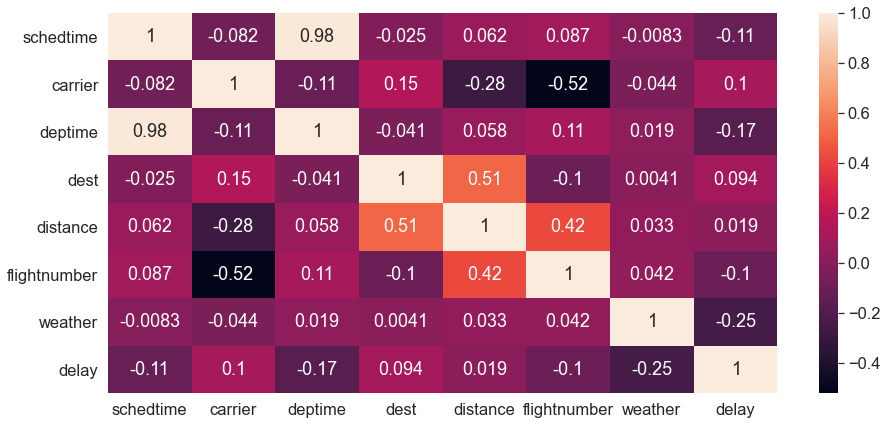

In [46]:
plot.figure(1, (15, 7))
sb.heatmap(df.corr(), annot=True)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x = df.drop('delay', axis=1)
y = df['delay']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

In [50]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression().fit(xtrain, ytrain)

predictions = model.predict(xtest)
probability = model.predict_proba(xtest)

In [68]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

In [55]:
confusion_matrix(ytest, predictions)

array([[ 38,  50],
       [  3, 350]], dtype=int64)

In [70]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        88
           1       0.88      0.99      0.93       353

    accuracy                           0.88       441
   macro avg       0.90      0.71      0.76       441
weighted avg       0.89      0.88      0.86       441



Text(0.5, 1.0, '0.826841359773371')

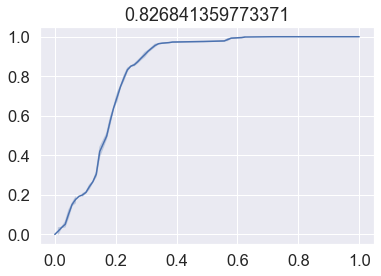

In [82]:
fpr, tpr, threshold = roc_curve(ytest, model.predict_proba(xtest)[:,1], pos_label=0)

sb.lineplot(x=tpr, y=fpr)
auc = roc_auc_score(ytest, model.predict_proba(xtest)[:,1])
plot.title(str(auc))